<a href="https://colab.research.google.com/github/elizabethts/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
haberman_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
haberman_column_headers = ['Age at Operation Time', 'Operation Year', 
                           'Positive Axillary Nodes Detected', 
                           'Survival Status']
                           #define column headers
                         

haberman_df = pd.read_csv(haberman_url, names=haberman_column_headers)

In [24]:
haberman_df.head()

,Age at Operation Time,Operation Year,Positive Axillary Nodes Detected,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [234]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data #| wc

30,64,1,1
30,62,3,1
30,65,0,1
31,59,2,1
31,65,4,1
33,58,10,1
33,60,0,1
34,59,0,2
34,66,9,2
34,58,30,1
34,60,1,1
34,61,10,1
34,67,7,1
34,60,0,1
35,64,13,1
35,63,0,1
36,60,1,1
36,69,0,1
37,60,0,1
37,63,0,1
37,58,0,1
37,59,6,1
37,60,15,1
37,63,0,1
38,69,21,2
38,59,2,1
38,60,0,1
38,60,0,1
38,62,3,1
38,64,1,1
38,66,0,1
38,66,11,1
38,60,1,1
38,67,5,1
39,66,0,2
39,63,0,1
39,67,0,1
39,58,0,1
39,59,2,1
39,63,4,1
40,58,2,1
40,58,0,1
40,65,0,1
41,60,23,2
41,64,0,2
41,67,0,2
41,58,0,1
41,59,8,1
41,59,0,1
41,64,0,1
41,69,8,1
41,65,0,1
41,65,0,1
42,69,1,2
42,59,0,2
42,58,0,1
42,60,1,1
42,59,2,1
42,61,4,1
42,62,20,1
42,65,0,1
42,63,1,1
43,58,52,2
43,59,2,2
43,64,0,2
43,64,0,2
43,63,14,1
43,64,2,1
43,64,3,1
43,60,0,1
43,63,2,1
43,65,0,1
43,66,4,1
44,64,6,2
44,58,9,2
44,63,19,2
44,61,0,1
44,63,1,1
44,61,0,1
44,67,16,1
45,65,6,2
45,66,0,2
45,67,1,2
45,60,0,1
45,67,0,1
45,59,14,1
45,64,0,1
45,68,0,1
45,67,1,1
46,58,2,2
46,69,3,2
46,62,5,2
46,65,20,2
46,62,0,1
46,58,3,1
46,63,0,1
47,63,23,2
47,62,0,2
47,6

In [14]:
haberman_df.shape

(306, 4)

In [15]:
haberman_df.isnull().sum() #check for missing values

Age at op time             0
Operation year             0
Axillary nodes detected    0
Survival status            0
dtype: int64

In [0]:
def two_to_zero(i): #function to change 2's to 0's
  if i==2:
    return 0 
  else:
    return i

In [0]:
#apply two_to_zero to Survival status
haberman_df['Survival Status'] = haberman_df['Survival Status'].apply(two_to_zero)

In [37]:
haberman_df.head()

,Age at Operation Time,Operation Year,Positive Axillary Nodes Detected,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
age_bins = pd.cut(haberman_df['Age at Operation Time'], 5) #create 10 bins

#create a crosstab of age and survival status
haberman_ct_1 = pd.crosstab(age_bins, haberman_df['Survival Status'],
                           normalize = True) 

In [137]:
haberman_ct_1

Survival Status,0,1
Age at Operation Time,,
"(29.947, 40.6]",0.013072,0.127451
"(40.6, 51.2]",0.101307,0.222222
"(51.2, 61.8]",0.088235,0.225490
"(61.8, 72.4]",0.052288,0.140523
"(72.4, 83.0]",0.009804,0.019608


In [0]:
node_bins = pd.cut(haberman_df['Positive Axillary Nodes Detected'], 5) #create 5 bins

#create a crosstab of nodes and survival status
haberman_ct_2 = pd.crosstab(node_bins, haberman_df['Survival Status'], normalize = True)

In [209]:
haberman_ct_2

Survival Status,0,1
Positive Axillary Nodes Detected,,
"(-0.052, 10.4]",0.189542,0.679739
"(10.4, 20.8]",0.049020,0.035948
"(20.8, 31.2]",0.019608,0.016340
"(31.2, 41.6]",0.003268,0.000000
"(41.6, 52.0]",0.003268,0.003268


In [225]:
#create a crosstab of age and nodes
haberman_ct_3 = pd.crosstab(age_bins, haberman_df['Positive Axillary Nodes Detected'], normalize = True)
haberman_ct_3

Positive Axillary Nodes Detected,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52
Age at Operation Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(29.947, 40.6]",0.062092,0.016340,0.013072,0.006536,0.006536,0.003268,0.003268,0.003268,0.000000,0.003268,0.006536,0.003268,0.000000,0.003268,0.000000,0.003268,0.000000,0.000000,0.000000,0.000000,0.000000,0.003268,0.000000,0.000000,0.000000,0.000000,0.000000,0.003268,0.000000,0.000000,0.000000
"(40.6, 51.2]",0.130719,0.049020,0.022876,0.019608,0.016340,0.003268,0.013072,0.006536,0.009804,0.003268,0.003268,0.006536,0.003268,0.006536,0.006536,0.000000,0.003268,0.000000,0.000000,0.003268,0.006536,0.000000,0.000000,0.006536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003268
"(51.2, 61.8]",0.117647,0.049020,0.016340,0.029412,0.016340,0.013072,0.003268,0.013072,0.003268,0.009804,0.000000,0.003268,0.003268,0.000000,0.003268,0.003268,0.000000,0.003268,0.003268,0.003268,0.000000,0.000000,0.003268,0.003268,0.003268,0.003268,0.000000,0.000000,0.003268,0.003268,0.000000
"(61.8, 72.4]",0.120915,0.013072,0.009804,0.003268,0.003268,0.000000,0.003268,0.000000,0.009804,0.003268,0.000000,0.000000,0.000000,0.006536,0.003268,0.003268,0.000000,0.000000,0.000000,0.003268,0.000000,0.000000,0.006536,0.000000,0.000000,0.000000,0.003268,0.000000,0.000000,0.000000,0.000000
"(72.4, 83.0]",0.013072,0.006536,0.003268,0.006536,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [0]:
#Survival rate increases as age approaches ~55 and then decreases. Follows a normal distribution
#Survival rate increases as axillary nodes decrease. Inversely related 

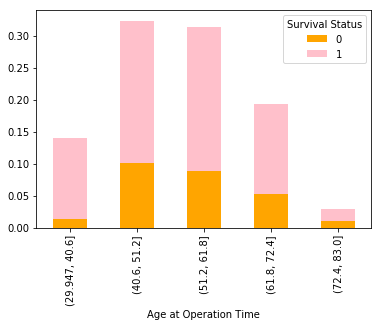

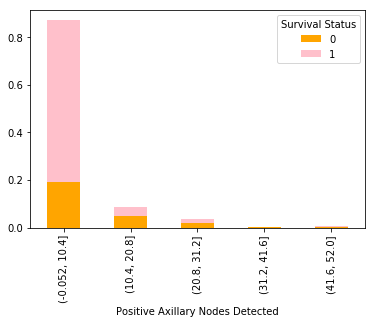

In [269]:
#stacked bar plots
#first is Age v Survival
#second is Nodes v Survival

haberman_ct_1.plot(kind='bar', color = ['orange','pink'], stacked=True);
haberman_ct_2.plot(kind='bar', color = ['orange','pink'], stacked=True);

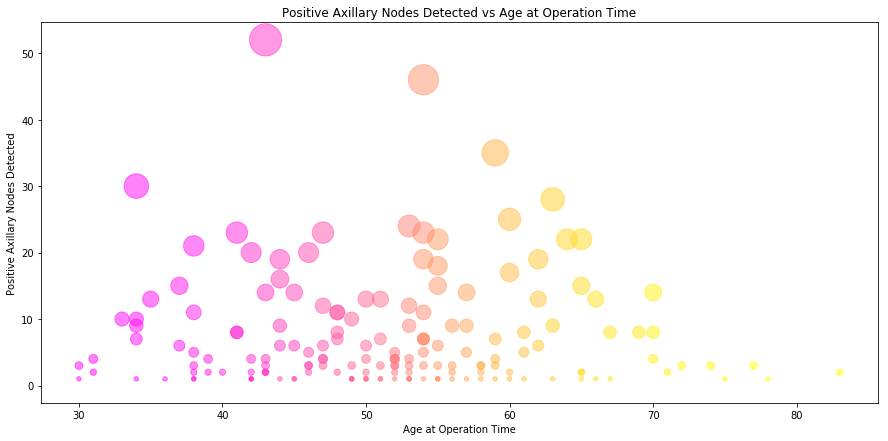

In [262]:
#Scatter plot of Nodes vs Age

x = np.arange(306)
y = x
t = x

fig, ax1 = plt.subplots()
fig.set_size_inches(15, 7)
ax1.set_xlabel('Age at Operation Time')
ax1.set_ylabel('Positive Axillary Nodes Detected')
ax1.set_title('Positive Axillary Nodes Detected vs Age at Operation Time')
plt.scatter(haberman_df['Age at Operation Time'], haberman_df['Positive Axillary Nodes Detected'], 
            s = haberman_df['Positive Axillary Nodes Detected']*20, c = t , cmap = 'spring' , alpha = .5);


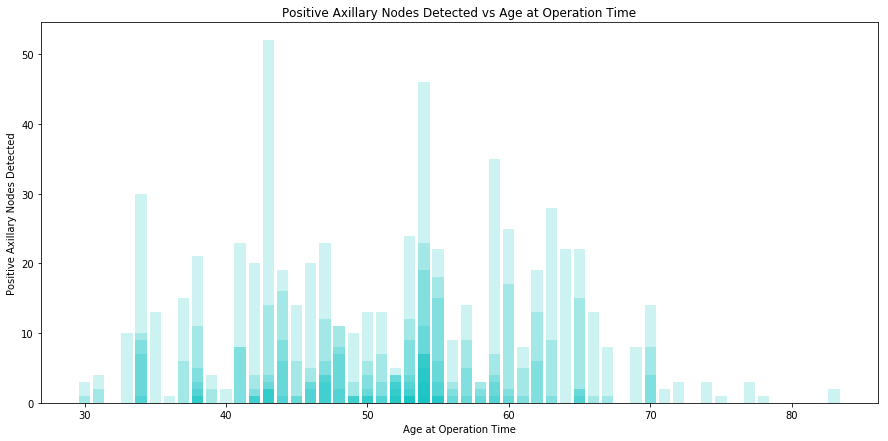

In [246]:
#Bar chart of Nodes vs Age

fig, ax2 = plt.subplots()
fig.set_size_inches(15, 7)
ax2.set_xlabel('Age at Operation Time')
ax2.set_ylabel('Positive Axillary Nodes Detected')
ax2.set_title('Positive Axillary Nodes Detected vs Age at Operation Time')
plt.bar(haberman_df['Age at Operation Time'], haberman_df['Positive Axillary Nodes Detected'], 
        color = 'c', alpha = .2);


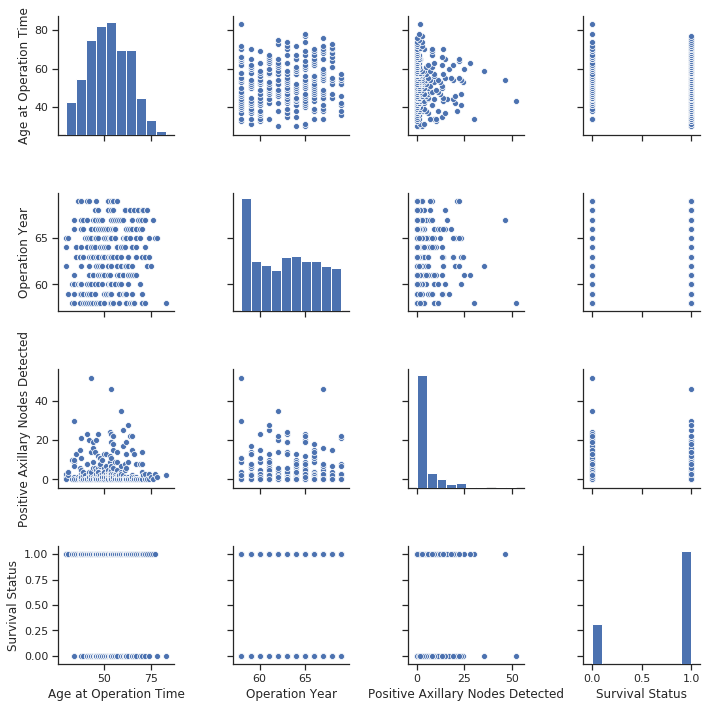

In [278]:
#pairplot of the Haberman data
sns.set(style="ticks", color_codes=True)
sns.pairplot(haberman_df);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

   
      Age. As age increased, the rate of survival also increased, 
      but after ~55 years old the survival rate began decreasing again.
      
  
- What is at least one feature that looks to have a negative relationship with survival?


    Nodes.  As less nodes were detected, the probability of survival went up. Survival and nodes are inversely related.
    
    
- How are those two features related with each other, and what might that mean?


    Age and nodes don't have a directly correlated relationship but people between the ages of
    ~45-55 have significantly lower nodes present. Since this age group has lower nodes, 
     and the presence of nodes are inversely related with survival, their probability of survival would increase.
     This makes the 45-55 age group the best candidate for the surgery.
     

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.